In thisn course, I am trying to classify data by considering  K-Nearest Neighbors

K-Nearest Neighbors is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.

The "k" stands for the number of neighbors you look at. If you use a small k, you might be influenced by noisy points. If you use a big k, you might be influenced by too many points and miss local patterns.

Imagine have a bunch of points on a graph, and each point has a class A & B. . We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points), we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.

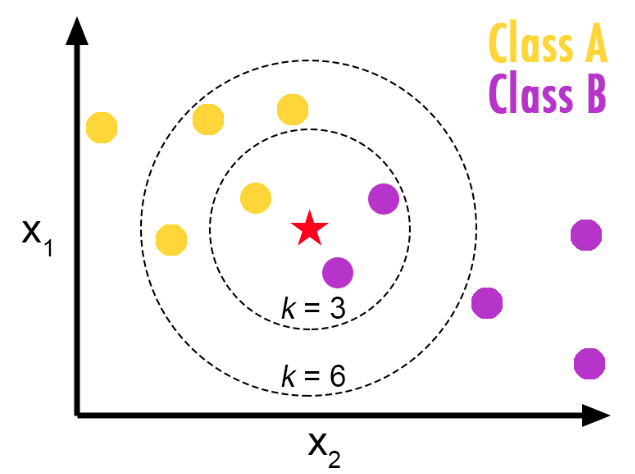

In [1]:

from IPython.display import Image, display

display(Image(filename='/Users/user/Pictures/ScreenShot/KNN.png'))

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into <b>four classes</b>. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. 
different service levels:*<b>This is classification problem</b>*

<b>1- Basic Service:</b> Customers who are associated with basic service offerings.

<b>2- E-Service:</b> Customers who are associated with electronic services or online services.

<b>3- Plus Service:</b> Customers who are associated with a service level higher than basic, potentially with additional features.

<b>4- Total Service:</b> Customers who are associated with the highest service level, possibly offering a comprehensive range of services.

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

1. Load the dataset and separate the features and target variable.

2. Normalize the features using StandardScaler.

3. Split the data into training and testing sets.

# Read Data

In [2]:
import pandas as pd
path="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv"
df = pd.read_csv(path)
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
#The target field, called custcat, has four possible values that correspond to the four customer groups.
#how many of each class is in data set
df['custcat'].value_counts()


3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [4]:
df1=df['custcat'].value_counts().to_frame()
print(df1)

   custcat
3      281
1      266
4      236
2      217


In [5]:
import pandas as pd

# Dictionary mapping class values to class names
custcat = {1: 'Basic Service', 2: 'E-Service', 3: 'Plus Service', 4: 'Total Service'}

# Get value counts for each class
class_counts = df['custcat'].value_counts()

# Create a DataFrame with class names and counts
class_table = pd.DataFrame({'Class Name': class_counts.index.map(custcat),
                            'Count': class_counts.values})

print(class_table)


      Class Name  Count
0   Plus Service    281
1  Basic Service    266
2  Total Service    236
3      E-Service    217


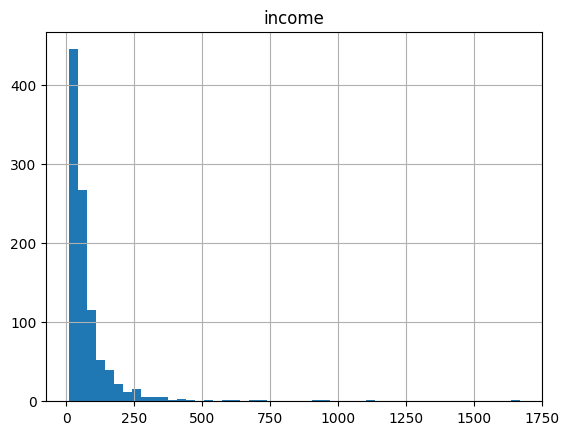

In [6]:
import matplotlib.pyplot as plt
df.hist(column='income', bins=50)
plt.show()

In [7]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [8]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [15]:
y = df['custcat'].values
y[0:10]

array([1, 4, 3, 1, 3, 3, 2, 4, 3, 2])

In [16]:
df['custcat'].dtype

dtype('int64')

# Normalize Data

In [37]:
#Data Preprocessing
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Check for missing values, handle categorical variables if any, and normalize the features.
print(df.isnull().sum())

# excluding the 'custcat' column from the features, 
#as want to use the other columns as input features for machine learning model.
X = df.drop(columns=['custcat'])  # Features
y = df['custcat']  # Target

# Normalize features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64


indicates the result of checking for missing values in each column of DataFrame. which<b> There are no missing values in the dataset.</b>

In [38]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

X[0:3]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004]])

The StandardScaler is a preprocessing technique that standardizes features by removing the mean and scaling to unit variance. This process is also known as z-score normalization.

The scaled feature values have been transformed to have zero mean and unit variance, which is a common practice in machine learning to ensure that features are on similar scales. 

<b>Original data (before scaling):</b>

[feature1_value, feature2_value, ..., feature11_value]


<b>Scaled data (after applying StandardScaler):</b>
    
[scaled_feature1_value, scaled_feature2_value, ..., scaled_feature11_value]    

In [39]:
df.shape

(1000, 12)

In [40]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


# Classification

Classifier implementing the k-nearest neighbors vote.

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# Training

first we try algorithm with k=4 

In [26]:
k = 4

#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

# Predicting

 use the model to make predictions on the test set:

In [27]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4])

In [28]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


In [31]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.51625
Test set Accuracy:  0.31


In [30]:
import numpy as np

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, jaccard_score
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Define a range of k values to consider
Ks = 10
k_values = list(range(1, Ks))

# Create a dictionary to store accuracy and Jaccard index for each k
results = {}

for k in k_values:
    # Train KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict labels
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate Jaccard index (you'll need to replace this with your actual yhat predictions)
    jaccard = jaccard_score(y_test, y_pred, average='weighted')
    
    # Store results in dictionary
    results[k] = {'accuracy': accuracy, 'jaccard': jaccard}

# Print the results dictionary/ key,value
for k, v in results.items():
    print(f'k = {k}, Accuracy = {v["accuracy"]:.2f}, Jaccard Index = {v["jaccard"]:.2f}')


k = 1, Accuracy = 0.30, Jaccard Index = 0.18
k = 2, Accuracy = 0.29, Jaccard Index = 0.15
k = 3, Accuracy = 0.32, Jaccard Index = 0.18
k = 4, Accuracy = 0.32, Jaccard Index = 0.19
k = 5, Accuracy = 0.32, Jaccard Index = 0.18
k = 6, Accuracy = 0.31, Jaccard Index = 0.18
k = 7, Accuracy = 0.34, Jaccard Index = 0.20
k = 8, Accuracy = 0.33, Jaccard Index = 0.19
k = 9, Accuracy = 0.34, Jaccard Index = 0.20


In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, jaccard_score
import numpy as np

# ... (code to load and preprocess the data)

# Define a range of k values to consider
Ks = 10
k_values = list(range(1, Ks))

# Create a list to store the results
result_list = []

for k in k_values:
    # Train KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict labels
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate Jaccard index (you'll need to replace this with your actual yhat predictions)
    jaccard = jaccard_score(y_test, y_pred, average='weighted')
    
    # Append results to the list
    result_list.append((k, accuracy, jaccard))

# Print the results list
for result in result_list:
    k, accuracy, jaccard = result
    print(f'k = {k}, Accuracy = {accuracy:.2f}, Jaccard Index = {jaccard:.2f}')


k = 1, Accuracy = 0.30, Jaccard Index = 0.18
k = 2, Accuracy = 0.29, Jaccard Index = 0.15
k = 3, Accuracy = 0.32, Jaccard Index = 0.18
k = 4, Accuracy = 0.32, Jaccard Index = 0.19
k = 5, Accuracy = 0.32, Jaccard Index = 0.18
k = 6, Accuracy = 0.31, Jaccard Index = 0.18
k = 7, Accuracy = 0.34, Jaccard Index = 0.20
k = 8, Accuracy = 0.33, Jaccard Index = 0.19
k = 9, Accuracy = 0.34, Jaccard Index = 0.20


In [51]:
# Print the Jaccard Index values
for result in result_list:
    k, _, jaccard = result  # Extract k and jaccard values from the tuple
    print(f'k = {k}, Jaccard Index = {jaccard:.2f}')

k = 1, Jaccard Index = 0.18
k = 2, Jaccard Index = 0.15
k = 3, Jaccard Index = 0.18
k = 4, Jaccard Index = 0.19
k = 5, Jaccard Index = 0.18
k = 6, Jaccard Index = 0.18
k = 7, Jaccard Index = 0.20
k = 8, Jaccard Index = 0.19
k = 9, Jaccard Index = 0.20


Jaccard-index close to one is more accuracy

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, jaccard_score

# Train and evaluate the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Calculate accuracy for Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

# Calculate Jaccard Index for Random Forest
rf_jaccard = jaccard_score(y_test, rf_predictions, average='weighted')
print("Random Forest Jaccard Index:", rf_jaccard)

# Compare with KNN results
print("KNN Accuracy:", knn_accuracy)  # Replace with actual KNN accuracy
print("KNN Jaccard Index:", knn_jaccard)  # Replace with actual KNN Jaccard Index


Random Forest Accuracy: 0.365
Random Forest Jaccard Index: 0.22111089236293402
KNN Accuracy: 0.32
KNN Jaccard Index: 0.18


In [54]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, jaccard_score

# Train and evaluate the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Calculate accuracy for Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Calculate Jaccard Index for Random Forest
rf_jaccard = jaccard_score(y_test, rf_predictions, average='weighted')


# Create a list of dictionaries containing model results
results = [
    {'Model': 'Random Forest', 'Accuracy': rf_accuracy, 'Jaccard Index': rf_jaccard},
    {'Model': 'KNN', 'Accuracy': knn_accuracy, 'Jaccard Index': knn_jaccard}
]

# Convert the list of dictionaries to a Pandas DataFrame
results_df = pd.DataFrame(results)

# Print the matrix
print(results_df)


           Model  Accuracy  Jaccard Index
0  Random Forest     0.365       0.221111
1            KNN     0.320       0.180000
